# HW3 MNIST Dataset Analysis
Shaunak Bhide
EE399


In [2]:
#import cell
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD


In [46]:
# Load the MNIST data
mnist = fetch_openml('mnist_784')
#MNIST_784 is 70000 x 784
#contains 700000 images with 784 feature vectors
# Convert X and y to numpy arrays
X = np.array(mnist.data / 255.0)  # Scale data to range [0, 1]

#reshape dataset to have images as column vectors
# 784 x 70000
X = X.T

#this code snippet reshapes image column vectors back into a 28x28 array so we can view it
# original_img = X[:, img_index].reshape(28, 28)
#will be using this later

In [47]:
# Perform SVD
# full_matrices=False indicates a truncated SVD
U, S, Vt = np.linalg.svd(X, full_matrices=False)

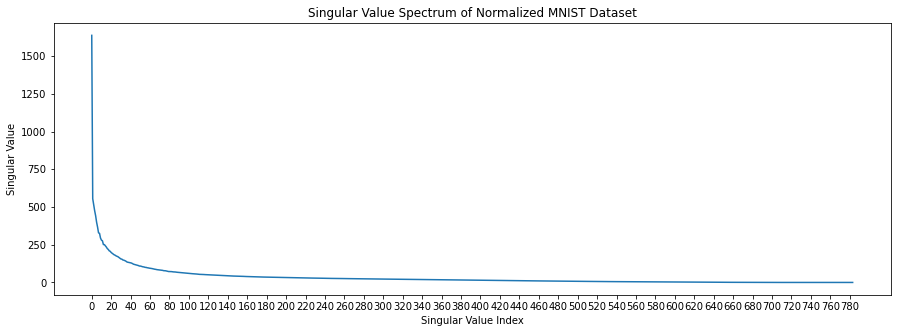

Number of modes necessary for 90% image reconstruction: 53


In [92]:
#2 What does the singular value spectrum look like? How many modes are necessary for good image reconstruction?
# (what is the rank of the digit space?)


fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(S)
ax.set_xlabel('Singular Value Index')
ax.set_ylabel('Singular Value')
ax.set_title('Singular Value Spectrum of Normalized MNIST Dataset')
ax.set_xticks(np.arange(0, len(S), 20))
ax.set_xticklabels(np.arange(0, len(S), 20))
plt.show()

# Determine how many modes are necessary for good image reconstruction
cumulative_energy = np.cumsum(S**2) / np.sum(S**2)
threshold = 0.90
r = np.argmax(cumulative_energy >= threshold) + 1
print(f'Number of modes necessary for {threshold:.0%} image reconstruction: {r}')


3. We can interpret the **U**, **&Sigma;**, **V** matricies as follows.  

    - The **U** matrix contains images in the dataset. Each column of **U** is a different image, and each entry down the column represents the contribution of each principal component to that image.  

    - The **&Sigma;** matrix is a diagonal matrix indicating the weights of each principal component. It is arranged in descending order. So in this case, the values in the **&Sigma;** matrix tell us how important each principal component is to all the images in the set. These singular values are graphed above, and we can see that there is a steep dropoff in relevance after the first 50-60 principal components. This tells us that we can reliably reconstruct images using only the first 50-60 principal components.  

    - The **V** matrix is structured such that each row is a principal component, and each entry across the row represents how each pixel contributes to a given principal component.  



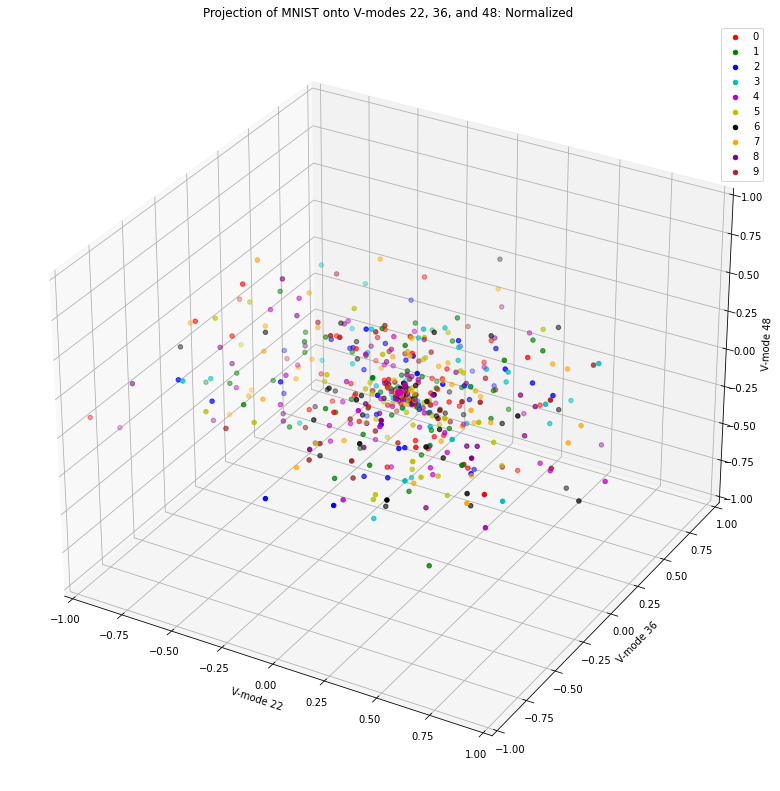

In [186]:
#Problem 4: Projecting MNIST data onto 
# Select three columns of V
V_select = Vt[[22, 36, 48], :]

# Project X_reshaped onto the selected V-modes
X_proj = X @ V_select.T
X_proj = (X_proj / np.max(X_proj))

# Color the points by their digit label
y = np.array(mnist.target)
unique_vals = np.unique(y) #finding unique values in y aka digits 0-9
num_vals = len(unique_vals)
colors = ["r", "g", "b", "c", "m", "y", "k", "orange", "purple", "brown"] #list of colors

# Set up the figure. Larger figsize so its easier to see
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

# Plotting
for i, val in enumerate(unique_vals):
    indices = np.where(y == val)[0]
    valid_indices = np.intersect1d(indices, np.arange(X_proj.shape[0]))
    ax.scatter3D(X_proj[valid_indices, 0], X_proj[valid_indices, 1], X_proj[valid_indices, 2], color=colors[i], label=str(val))

#labels and titles
ax.set_xlabel('V-mode 22')
ax.set_ylabel('V-mode 36')
ax.set_zlabel('V-mode 48')
ax.set_title('Projection of MNIST onto V-modes 22, 36, and 48: Normalized')
ax.legend()
# Set the axis limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.show()

In [162]:
#import cell for HW part 2! Focusing on the sklearn package to create LDAs, SVDs, and decision trees
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [169]:
#Defining training and test data. Using 80% of the data as training, and 20% as test
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.2, random_state=42)

#Training for classifying 2 and 7
#generate samples of correctly labeled numbers
digit_indices = np.where((y_train == 2) | (y_train == 7))[0]
X_train_2_7 = X_train[digit_indices, :]
y_train_2_7 = y_train[digit_indices]

# Train LDA classifier
lda = LDA()
lda.fit(X_train_2_7, y_train_2_7)

#make predictions on test data
y_pred_2_7 = lda.predict(X_test)



# Calculate overall accuracy
accuracy = sum(y_pred_2_7 == y_test) / len(y_test)
print(f"Overall accuracy: {accuracy:.2f}")

(70000,)


ValueError: Found input variables with inconsistent numbers of samples: [784, 70000]